<a href="https://colab.research.google.com/github/geunsu-jo/KCYPS_project/blob/main/201611533_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [371]:
import numpy as np
import pandas as pd

In [372]:
train_data = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/train_data.xlsx")
test_data = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/test_data.xlsx")

In [373]:
train_data.shape, test_data.shape

((1950, 42), (488, 42))

__target__ 데이터 생성

In [374]:
y_train = train_data["y"]
y_test = test_data["y"]

__feature__데이터 생성

In [375]:
X_train = train_data.drop(['y'], axis=1)
X_test = test_data.drop(['y'], axis=1)
X_train.head(3)

,YTIM1C02w2,YTIM1D02w2,YTIM1E02w2,YTIM1G02w2,YTIM1K01w2,YTIM1K02w2,YTIM1L02w2,YTIM1N01w2,YTIM1N02w2,YINT2B08w2,YINT2B16w2,YPSY4A01w2,YPSY4A02w2,YPSY4B02w2,YPSY4B04w2,YPSY4B05w2,YPSY4C02w2,YPSY4C03w2,YPSY4C05w2,YPSY4C08w2,YPSY5A05w2,YPSY5A06w2,YPSY6A08w2,YPSY6A20w2,YPSY6A30w2,YDLQ2A01w2,YDLQ2A02w2,YDLQ2A11w2,YDLQ2A13w2,YDLQ2A15w2,YMDA1B05w2,YMDA1B06w2,YMDA1B09w2,YMDA1C01w2,YMDA1C02w2,YMDA1C08w2,YMDA1C14w2,YEDU2A09w2,YEDU3A04w2,YEDU3A05w2,YEDU3A10w2
0,3,3,1,1,4,5,2,4,4,2,2,2,2,2,2,2,2,2,2,2,3,3,0,1,0,1,1,1,1,1,4,1,4,3,2,2,3,2,2,3,2
1,3,5,1,1,6,6,6,5,6,2,2,2,2,2,2,2,2,2,3,2,4,3,0,0,0,1,1,1,1,1,2,4,4,2,3,2,3,3,3,3,3
2,4,4,1,1,4,4,3,4,5,1,1,3,2,2,1,1,1,2,1,2,3,4,0,1,0,1,1,1,1,1,3,2,4,2,2,1,1,1,2,2,2


([<matplotlib.axis.XTick at 0x7f3c9d2414e0>,
 <a list of 2 Text major ticklabel objects>)

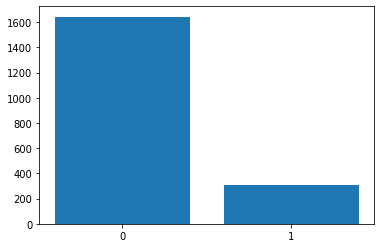

In [376]:
import matplotlib.pyplot as plt
freq = y_train.value_counts()
plt.bar(freq.index, freq)
plt.xticks(freq.index.values)

__표준화__

In [377]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

## 랜포

In [467]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

param_rfc = {'n_estimators':np.arange(300,500),
             'max_features':np.arange(4,8)}

rfc = RandomForestClassifier(n_jobs=-1, random_state=42)
rnd_search_rfc = RandomizedSearchCV(rfc, param_rfc, n_iter=20, cv=5, 
                           scoring="recall",
                           return_train_score=True)
rnd_search_rfc.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [468]:
rnd_search_rfc.best_params_

{'max_features': 7, 'n_estimators': 450}

In [469]:
pred_rf_proba = rnd_search_rfc.best_estimator_.predict_proba(X_test_scaled)[:,1]

from sklearn.metrics import roc_curve
fpr, tpr, thr = roc_curve(y_test, pred_rf_proba)

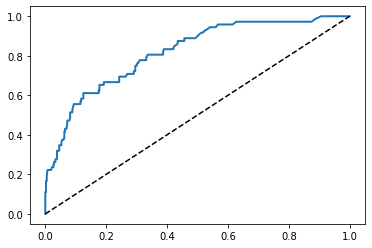

In [470]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')

plot_roc_curve(fpr, tpr)

## SVM

In [471]:
from sklearn.svm import SVC

svc = SVC(kernel="rbf", gamma=0.1, C=0.2, probability=True, random_state=42)
svc.fit(X_train_scaled, y_train)

SVC(C=0.2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [472]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

param_svm = {
    "gamma": np.arange(1,10)/50,
    "C": np.arange(1,10)/20
}
svc = SVC(kernel="rbf", probability=True, random_state=42)

rnd_search_svc = RandomizedSearchCV(svc, param_svm, n_iter=20, cv=5,
                                   scoring="recall", random_state=42,
                                   return_train_score=True) # n_iter는 파라미터공간에서 선택할(반복할) 파라미터 수
rnd_search_svc.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=True, random_state=42,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]),
                                        'gamma': array([0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18])},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=True, scoring='recall', verbose=0)

In [473]:
rnd_search_svc.best_params_

{'C': 0.3, 'gamma': 0.02}

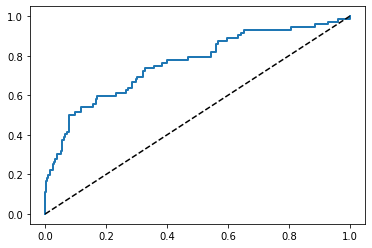

In [474]:
pred_svc_proba = rnd_search_svc.best_estimator_.predict_proba(X_test_scaled)[:,1]

fpr, tpr, thr = roc_curve(y_test, pred_svc_proba)
plot_roc_curve(fpr, tpr)